In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']
dt = pd.read_csv(r"D:\Amy\taobao_behavior_analysist\tianchi_mobile_recommend_train_user.csv")

In [2]:
dt

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22


# 给列明重命名

In [22]:
dt = dt.rename(columns={'user_id':'用户名','item_id':'商品名','behavior_type':'用户行为类型','user_geohash':'地理位置','InvoiceDate':'发票日期',
                            'item_category':'品类名','CustomerID':'用户名','time':'行为时间'})

In [5]:
#计算缺失率
dt.apply(lambda x:sum(x.isnull())/len(x))

用户名       0.00000
商品名       0.00000
用户行为类型    0.00000
地理位置      0.68001
品类名       0.00000
行为时间      0.00000
dtype: float64

# 时间格式

In [23]:
dt['date']=dt['行为时间'].str[0:10]
dt['date']=pd.to_datetime(dt['date']) #取年份并进行日期转换

dt['hour']=dt['行为时间'].str[11:]
dt['hour']=dt['hour'].astype(int)

In [6]:
dt['date']

0          2014-12-06
1          2014-12-09
2          2014-12-18
3          2014-12-06
4          2014-12-16
              ...    
12256901   2014-12-13
12256902   2014-12-14
12256903   2014-12-11
12256904   2014-12-08
12256905   2014-12-03
Name: date, Length: 12256906, dtype: datetime64[ns]

In [7]:
dt['hour']

0            2
1           20
2           11
3           10
4           21
            ..
12256901    21
12256902    21
12256903    16
12256904    22
12256905    19
Name: hour, Length: 12256906, dtype: int32

In [24]:
dt['行为时间']=pd.to_datetime(dt['行为时间'])

In [25]:
#将数据集按时间列进行升序排列
dt.sort_values(by='行为时间',ascending=True,inplace=True)

In [26]:
#舍弃原来的索引进行重置
dt.reset_index(drop=True,inplace=True)

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   用户名     int64         
 1   商品名     int64         
 2   用户行为类型  int64         
 3   地理位置    object        
 4   品类名     int64         
 5   行为时间    datetime64[ns]
 6   date    datetime64[ns]
 7   hour    int32         
dtypes: datetime64[ns](2), int32(1), int64(4), object(1)
memory usage: 701.3+ MB


In [9]:
dt.describe()

,用户名,商品名,用户行为类型,品类名,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


# 用户行为分析

In [16]:
#  PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。

# UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

In [10]:
#pv_daily记录每天用户操作次数
pv_daily=dt.groupby('date').count()['用户名'].rename('pv')

In [11]:
uv_daily=dt.groupby('date')['用户名'].nunique().rename('uv')

In [12]:
pv_uv_daily=pd.concat([pv_daily,uv_daily],axis=1)

In [13]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


# 画每天的访问量和独立访客数

In [14]:
#获取最小日期
dt['date'].value_counts().index[0]
#获取最大日期
dt['date'].value_counts().index[-1]

Timestamp('2014-11-21 00:00:00')

In [15]:
dt['date'].value_counts()

2014-12-12    691712
2014-12-11    488508
2014-12-10    421910
2014-12-03    411606
2014-12-13    407160
2014-12-02    405216
2014-12-14    402541
2014-11-30    401620
2014-12-04    399952
2014-12-07    399751
2014-12-15    398356
2014-12-09    398025
2014-12-16    395085
2014-12-01    394611
2014-12-06    389610
2014-12-08    386667
2014-12-17    384791
2014-11-23    382702
2014-11-24    378342
2014-12-18    375597
2014-11-27    371384
2014-11-25    370239
2014-11-18    366701
2014-11-29    364697
2014-12-05    361878
2014-11-22    361355
2014-11-26    360896
2014-11-19    358823
2014-11-20    353429
2014-11-28    340638
2014-11-21    333104
Name: date, dtype: int64

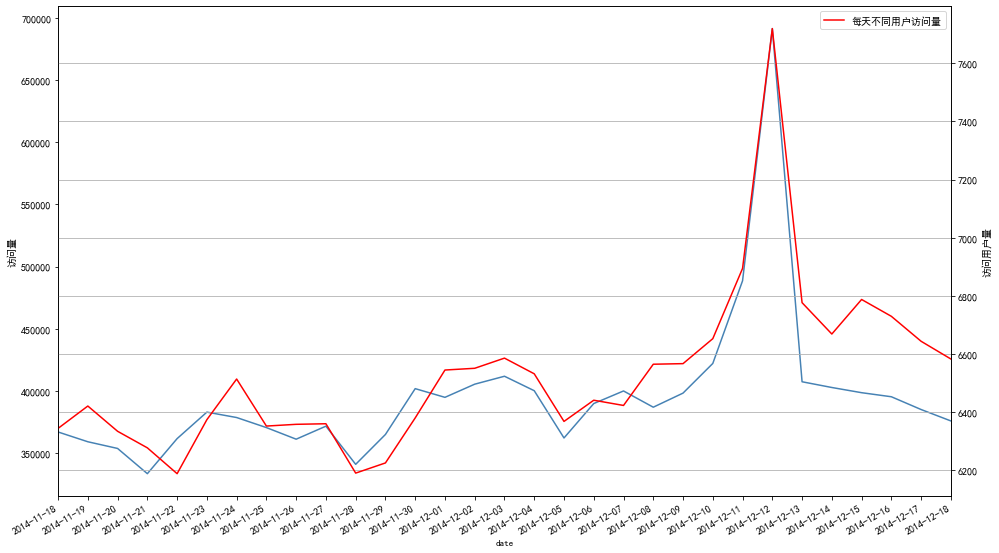

In [16]:
import matplotlib.dates as mdate
from matplotlib.dates import DateFormatter

plt.figure(figsize=(16,10))
plt.xlabel(' ',fontsize=9)
pv_uv_daily['pv'].plot(color='steelblue',label='每天访问量')
plt.ylabel('访问量')
fig=pv_uv_daily['uv'].plot(color='red',label='每天不同用户访问量',secondary_y=True)
plt.ylabel('访问用户量')
plt.xticks((pv_uv_daily.index),pd.date_range('2014-11-18','2014-12-18'))
plt.legend(loc='upper center')
plt.grid(True)
plt.gcf().autofmt_xdate() #坐标轴时间刻度自动调整。
fig.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.legend()
plt.show()

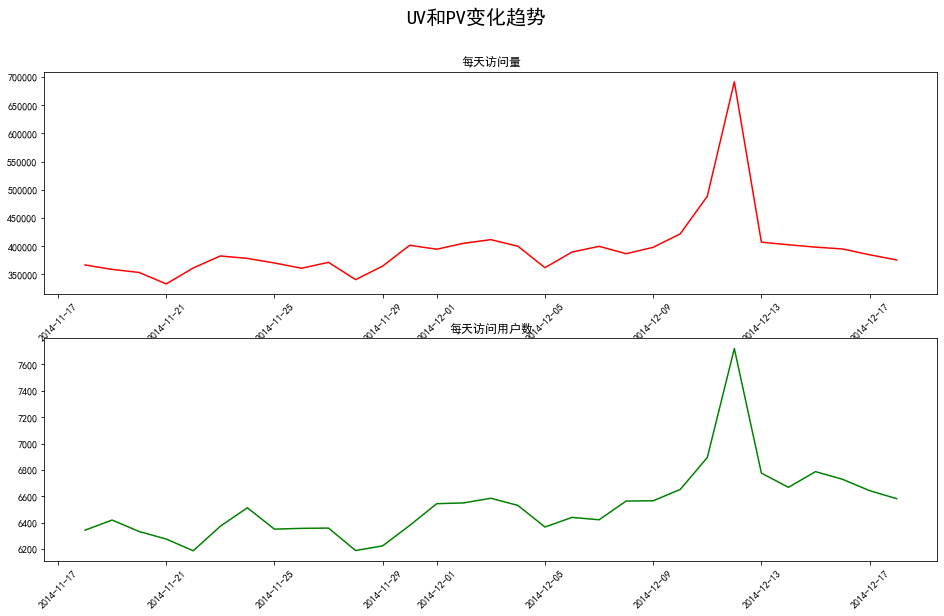

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(pv_daily,color='red')
plt.title('每天访问量')
plt.xticks(rotation=45) #X轴倾斜45°
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天访问用户数')
plt.suptitle('UV和PV变化趋势',fontsize=20)
plt.xticks(rotation=45) #X轴倾斜45°
plt.show()

In [9]:
pv_daily=dt.groupby('date')['用户名'].count().reset_index().rename(columns={'用户名':'pv'})
pv_daily.head()

,date,pv
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355


In [19]:
uv_daily=dt.groupby('date')['用户名'].nunique()

In [23]:
uv_daily.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: 用户名, dtype: int64

In [24]:
uv_daily=dt.groupby('date')['用户名'].nunique().reset_index()

In [10]:
uv_daily=dt.groupby('date')['用户名'].nunique().reset_index().rename(columns={'用户名':'uv'})

In [31]:
%matplotlib auto
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False


fig, ax1 = plt.subplots(figsize=(15,8))


l1, = ax1.plot(pv_daily['date'],pv_daily['pv'],label='pv',color='tab:green')




ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
l2,=ax2.plot(uv_daily['date'],uv_daily['uv'],label='uv',color='tab:red')


plt.grid(True)
#plt.xticks(pd.date_range('2014-11-18','2014-12-18'))
plt.xticks((pv_uv_daily.index),pd.date_range('2014-11-18','2014-12-18'))


plt.gcf().autofmt_xdate() #坐标轴时间刻度自动调整。
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))


fig.legend((l1, l2), ('pv', 'uv'),fontsize=15,loc='upper center', bbox_to_anchor=(0.92,0.94),fancybox=True, shadow=True)
plt.title('每天访问用户数',fontsize=15)



#plt.suptitle('UV和PV变化趋势',fontsize=20)


fig.tight_layout()

plt.show()

Using matplotlib backend: TkAgg


# 交互直线图

In [30]:
import matplotlib.dates as mdate
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
%matplotlib auto

fig, ax1 = plt.subplots(figsize=(15,8))

l1, = ax1.plot(pv_daily['date'],pv_daily['pv'],label='pv',color='steelblue')
plt.ylabel('访问量')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
l2,=ax2.plot(uv_daily['date'],uv_daily['uv'],label='uv',color='tab:red')
plt.ylabel('访客数')
plt.xlabel('date',fontsize=15)

#plt.xticks(pd.date_range('2014-11-18','2014-12-18'))
plt.xticks((pv_uv_daily.index),pd.date_range('2014-11-18','2014-12-18'))

plt.gcf().autofmt_xdate() #坐标轴时间刻度自动调整。
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))

fig.legend((l1, l2), ('pv', 'uv'),fontsize=15,loc='upper center', bbox_to_anchor=(0.85,0.85),fancybox=True, shadow=True)
plt.title('每天访问用户数',fontsize=15)

#plt.suptitle('UV和PV变化趋势',fontsize=20)
plt.grid(True)

# lines = [l1,l2]
# lined = {}  # Will map legend lines to original lines.
# for legline, origline in zip(leg.get_lines(), lines):
#     legline.set_picker(True)  # Enable picking on the legend line.
#     lined[legline] = origline
# def on_pick(event):
#     # On the pick event, find the original line corresponding to the legend
#     # proxy line, and toggle its visibility.
#     legline = event.artist
#     origline = lined[legline]
#     visible = not origline.get_visible()
#     origline.set_visible(visible)
#     # Change the alpha on the line in the legend so we can see what lines
#     # have been toggled.
#     legline.set_alpha(1.0 if visible else 0.2)
#     fig.canvas.draw()
# fig.canvas.mpl_connect('pick_event', on_pick)

plt.show()

Using matplotlib backend: TkAgg


小时访问量分析

In [15]:
uv_hour=dt.groupby('hour')['用户名'].nunique().reset_index().rename(columns={'用户名':'uv'})
pv_hour=dt.groupby('hour')['用户名'].count().reset_index().rename(columns={'用户名':'pv'})


In [16]:
pv_hour.head()

,hour,pv
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487


In [17]:
uv_hour.head()

,hour,uv
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765


In [18]:
pv_uv_hour=pd.concat([pv_hour,uv_hour],axis=1)

In [19]:
pv_uv_hour

,hour,pv,hour,uv
0,0,517404,0,5786
1,1,267682,1,3780
2,2,147090,2,2532
3,3,98516,3,1937
4,4,80487,4,1765
5,5,88296,5,2030
6,6,158798,6,3564
7,7,287337,7,5722
8,8,396106,8,7108
9,9,485951,9,7734


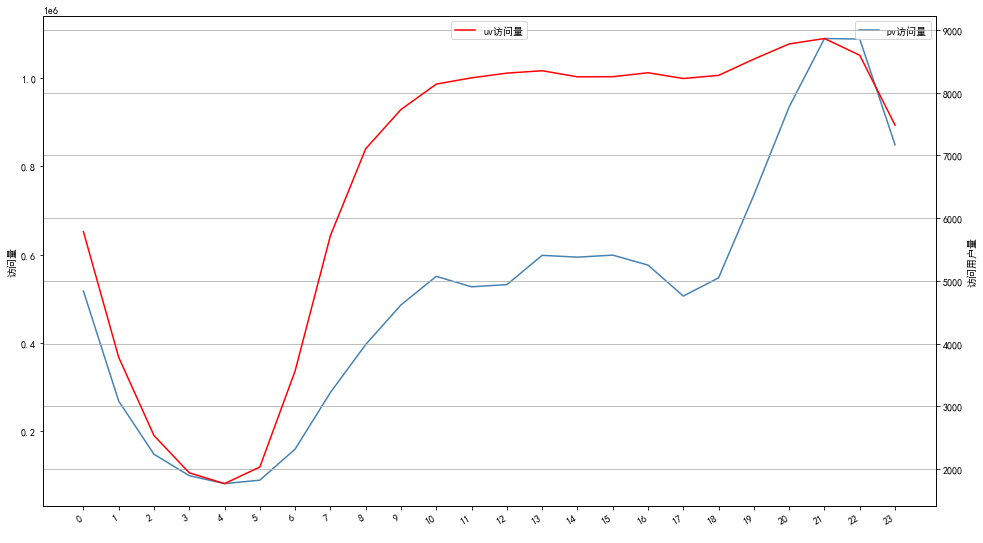

In [20]:
plt.figure(figsize=(16,10))
plt.xlabel(' ',fontsize=9)
pv_uv_hour['pv'].plot(color='steelblue',label='pv访问量')
plt.ylabel('访问量')
plt.legend(loc='upper right')
pv_uv_hour['uv'].plot(color='red',label='uv访问量',secondary_y=True)
plt.ylabel('访问用户量')
plt.xticks(range(0,24),pv_uv_hour.index)
plt.legend(loc='upper center')
plt.grid(True)
plt.gcf().autofmt_xdate() #坐标轴时间刻度自动调整。
plt.show()

不同类型的pv

In [27]:
dt['用户行为类型'].value_counts()

1    11550581
3      343564
2      242556
4      120205
Name: 用户行为类型, dtype: int64

In [28]:
pv_detail = pd.pivot_table(columns='用户行为类型', index = 'hour' ,data=dt ,values='用户名',aggfunc=np.size)

In [29]:

pv_detail

用户行为类型,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586


In [30]:
pv_detail = pd.pivot_table(columns='用户行为类型', index = 'hour' ,data=dt ,values='用户名',aggfunc='count')

In [19]:
pv_detail

用户行为类型,4
hour,
0,4845
1,1703
2,806
3,504
4,397
5,476
6,1023
7,1938
8,3586


In [39]:
#%matplotlib auto

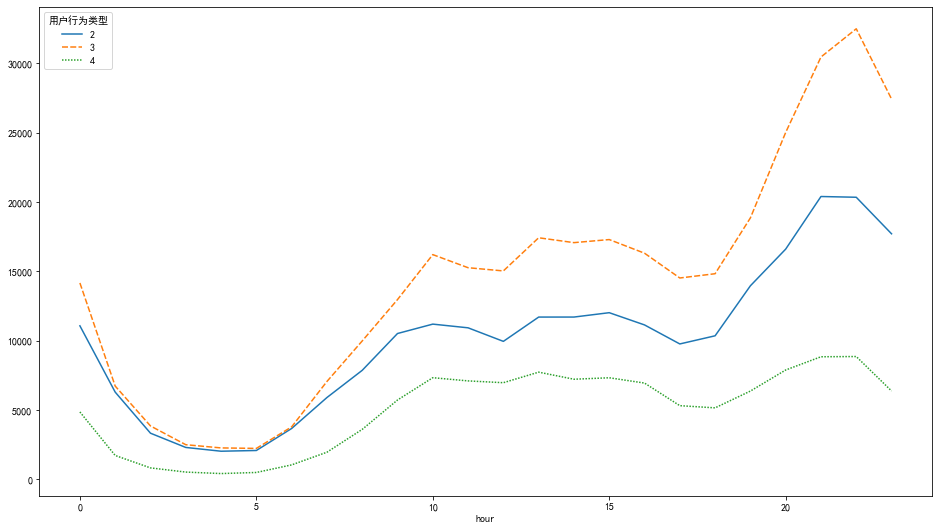

In [31]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail.iloc[:,1:])

plt.show()
#1-点击；2-收藏；3-购物车；4：支付

#可以看出加购的用户行为高于收藏的用户行为，后续可以把加购的用户行为放在前面分析

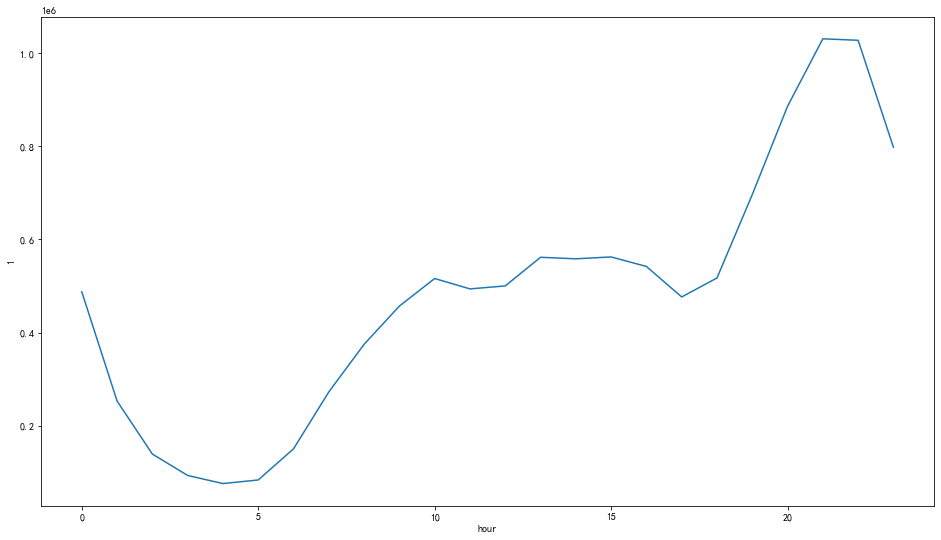

In [32]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail.iloc[:,0])
plt.show()

用户消费行为分析 

分析购买用户

In [37]:
data_user_buy=dt[dt['用户行为类型']==4].groupby('用户名')['用户行为类型'].count()
#求已经购买的用户，每个用户的浏览记录数

#uv_daily=dt.groupby('date')['用户名'].count()按天统计用户点击记录数
#uv_daily=dt.groupby('date')['用户名'].nunique()按天统计去重用户数量
#已经购买的用户里面访问次数
#data_user_buy.describe() #查看用户的浏览次数


In [38]:
data_user_buy

用户名
4913          6
6118          1
7528          6
7591         21
12645         8
             ..
142376113     1
142412247    12
142430177     5
142450275    40
142455899    13
Name: 用户行为类型, Length: 8886, dtype: int64

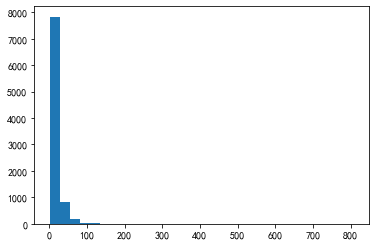

In [39]:
plt.hist(x=data_user_buy,bins=30)
plt.show()

#ARPPU（average revenue per paying user）
#付费用户，平均付费额度



In [ ]:
#针对已付费用户计算消费次数，即人均消费次数
data_use_buy1=dt[dt['用户行为类型']==4].groupby(['date','用户名'])['用户行为类型'].count().reset_index().rename(columns={'用户行为类型':'total'})

In [42]:
data_use_buy1

,date,用户名,total
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3
...,...,...,...
49196,2014-12-18,142138619,1
49197,2014-12-18,142168798,2
49198,2014-12-18,142244794,1
49199,2014-12-18,142306361,2


In [43]:
data_use_buy2=data_use_buy1.groupby('date').sum()['total']/data_use_buy1.groupby('date').count()['total']
#总消费次数/总消费人次=平均人均消费次数

In [44]:
data_use_buy2

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

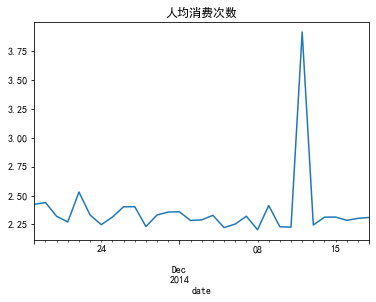

In [46]:
data_use_buy2.plot()
plt.title('人均消费次数')
plt.show()


In [47]:
data_use_buy2.describe()

count    31.000000
mean      2.368446
std       0.296108
min       2.204384
25%       2.262436
50%       2.313460
75%       2.358159
max       3.913523
Name: total, dtype: float64

In [48]:
#每天人均购买2次左右，最多的是购买近4次


In [49]:
dt

,用户名,商品名,用户行为类型,地理位置,品类名,行为时间,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18 00:00:00,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18 00:00:00,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18 00:00:00,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18 00:00:00,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18 00:00:00,2014-11-18,0
...,...,...,...,...,...,...,...,...
12256901,132653097,119946062,2,NaN,6054,2014-12-18 23:00:00,2014-12-18,23
12256902,130082553,296196819,1,NaN,11532,2014-12-18 23:00:00,2014-12-18,23
12256903,43592945,350594832,1,9rhhgph,9541,2014-12-18 23:00:00,2014-12-18,23
12256904,12833799,186993938,1,954g37v,3798,2014-12-18 23:00:00,2014-12-18,23


In [51]:
dt['operation']=1
#计算不同行为访问量
data_use_buy3=dt.groupby(['date','用户名','用户行为类型'])['operation'].count().reset_index().rename(columns={'operation':'total'})

In [52]:
data_use_buy3

,date,用户名,用户行为类型,total
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13
...,...,...,...,...
375435,2014-12-18,142430177,3,2
375436,2014-12-18,142430177,4,1
375437,2014-12-18,142450275,1,272
375438,2014-12-18,142450275,2,3


In [58]:
data_use_buy3[data_use_buy3['用户行为类型']==4].groupby('date').total.sum()




date
2014-11-18     3730
2014-11-19     3686
2014-11-20     3462
2014-11-21     3021
2014-11-22     3570
2014-11-23     3347
2014-11-24     3426
2014-11-25     3464
2014-11-26     3573
2014-11-27     3670
2014-11-28     3218
2014-11-29     3211
2014-11-30     3616
2014-12-01     3909
2014-12-02     3621
2014-12-03     3885
2014-12-04     3691
2014-12-05     3319
2014-12-06     3272
2014-12-07     3256
2014-12-08     3419
2014-12-09     3449
2014-12-10     3216
2014-12-11     3226
2014-12-12    15251
2014-12-13     3478
2014-12-14     3483
2014-12-15     3764
2014-12-16     3771
2014-12-17     3615
2014-12-18     3586
Name: total, dtype: int64

In [57]:
data_use_buy3[data_use_buy3['用户行为类型']==4].groupby('date')['用户名'].nunique()

date
2014-11-18    1539
2014-11-19    1511
2014-11-20    1492
2014-11-21    1330
2014-11-22    1411
2014-11-23    1436
2014-11-24    1524
2014-11-25    1497
2014-11-26    1487
2014-11-27    1527
2014-11-28    1442
2014-11-29    1377
2014-11-30    1534
2014-12-01    1657
2014-12-02    1585
2014-12-03    1697
2014-12-04    1585
2014-12-05    1493
2014-12-06    1452
2014-12-07    1403
2014-12-08    1551
2014-12-09    1429
2014-12-10    1442
2014-12-11    1449
2014-12-12    3897
2014-12-13    1549
2014-12-14    1506
2014-12-15    1627
2014-12-16    1650
2014-12-17    1570
2014-12-18    1552
Name: 用户名, dtype: int64

<AxesSubplot:xlabel='date'>

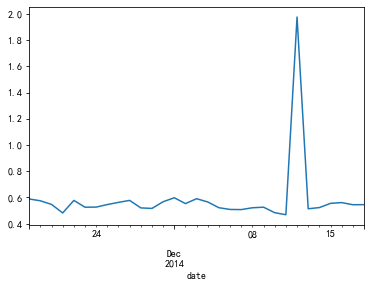

In [62]:
(data_use_buy3[data_use_buy3['用户行为类型']==4].groupby('date').total.sum()/data_use_buy3.groupby('date')['用户名'].nunique()).plot()
#付费总次数/总用户数

#付费率

In [64]:
#付费率=消费人数/活跃用户人数

Text(0.5, 1.0, 'daily_afford_rate')

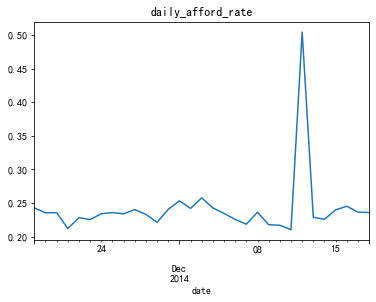

In [65]:
data_use_buy3.groupby('date').apply(lambda x:x[x.用户行为类型==4].total.count()/len(x.用户名.unique())).plot()
plt.title('daily_afford_rate')

大多数用户消费：1次


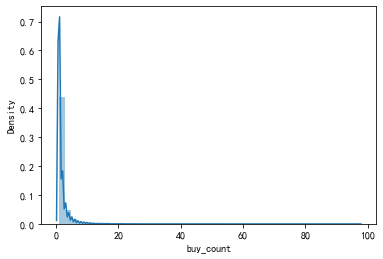

In [66]:
data_user_buy3=dt[dt.用户行为类型==4].groupby(['用户名','date','hour'])['operation'].sum().rename('buy_count')
sns.distplot(data_user_buy3)
print('大多数用户消费：{}次'.format(data_user_buy3.mode()[0]))

#复购行为，复购率

In [67]:
复购情况，即两天以上有购买行为,一天多次购买算一次
复购率=有复购行为的用户数/有购买行为的用户总数

SyntaxError: invalid character in identifier (<ipython-input-67-c601277bb884>, line 1)

In [68]:
date_rebuy=dt[dt.用户行为类型==4].groupby('用户名')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率:',round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(),4))

复购率: 0.8717


Text(0, 0.5, 'gap_count')

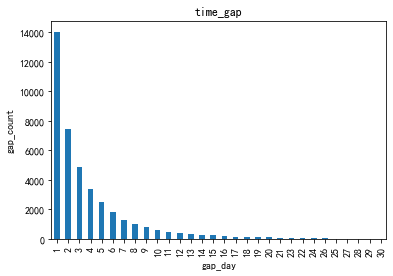

In [69]:
#所有复购时间间隔消费次数分布
data_day_buy=dt[dt.用户行为类型==4].groupby(['用户名','date']).operation.count().reset_index()
data_user_buy4=data_day_buy.groupby('用户名').date.apply(lambda x:x.sort_values().diff(1).dropna())
data_user_buy4=data_user_buy4.map(lambda x:x.days)
data_user_buy4.value_counts().plot(kind='bar')
plt.title('time_gap')
plt.xlabel('gap_day')
plt.ylabel('gap_count')

<AxesSubplot:xlabel='date', ylabel='Density'>

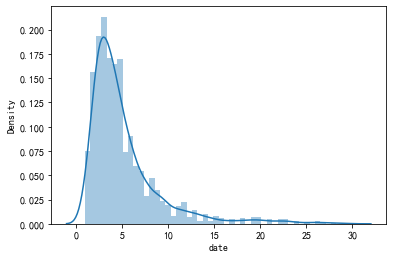

In [70]:
#不同用户平均复购时间分析
sns.distplot(data_user_buy4.reset_index().groupby('用户名').date.mean())

In [71]:
多数用户复购率为0.4693，消费次数随着消费时间间隔的增加而不断下降，
在1-10天之内复购次数比较多，10天之后复购次数淘宝用户很少在进行复购，
因此需要重视10天之内的淘宝用户复购行为，增加用户复购。不同用户平均复购时间呈正态分布，
但是总体来看，呈现逐渐下降趋势。多数淘宝用户平均复购时间集中在1-5天时间间隔内

SyntaxError: invalid syntax (<ipython-input-71-66230efc5c65>, line 1)

漏斗分析（浏览，点击，加购，支付）

In [76]:
data_user_count=dt['用户行为类型'].value_counts()

In [77]:
data_user_count

1    11550581
3      343564
2      242556
4      120205
Name: 用户行为类型, dtype: int64

In [78]:
#查看点击数据
data_user_count[1]

11550581

In [79]:
#计算总浏览量
pv_all=dt['用户名'].count()
pv_all

12256906

In [80]:
print('总浏览量—点击量 流失率: {:.2%}'.format((pv_all - data_user_count[1])/pv_all))
print('点击量-加入购物车量 流失率: {:.2%}'.format((data_user_count[1] - data_user_count[3])/data_user_count[1]))
print('加入购物车量-收藏量 流失率: {:.2%}'.format((data_user_count[3] - data_user_count[2])/data_user_count[3]))
print('收藏量—购买量 流失率: {:.2%}'.format((data_user_count[2] - data_user_count[4])/data_user_count[2]))

总浏览量—点击量 流失率: 5.76%
点击量-加入购物车量 流失率: 97.03%
加入购物车量-收藏量 流失率: 29.40%
收藏量—购买量 流失率: 50.44%


RFM分析

In [81]:
from datetime import datetime
datenow=datetime(2014,12,20)

#每位用户最近购买时间
recent_buy_time=dt[dt.用户行为类型==4].groupby('用户名')['date'].apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1])
recent_buy_time=recent_buy_time.reset_index().rename(columns={'date':'recent'})
#可简写为：recent_buy_time=data_user[data_user.behavior_type==4].groupby('user_id').date.apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy_time.recent=recent_buy_time.recent.map(lambda x:x.days)


#每个用户消费频率
buy_freq=dt[dt.用户行为类型==4].groupby('用户名').date.count().reset_index().rename(columns={'date':'freq'})
rfm=pd.merge(recent_buy_time,buy_freq,left_on='用户名',right_on='用户名',how='outer')

In [82]:
#将各维度分成两个程度,基于等频分段，分数越高越好
rfm['recent_value']=pd.qcut(rfm.recent,2,labels=['2','1']) #按组距分成两组
rfm['freq_value']=pd.qcut(rfm.freq,2,labels=['1','2'])
rfm['rfm']=rfm['recent_value'].str.cat(rfm['freq_value'])
rfm.head()

,用户名,recent,freq,recent_value,freq_value,rfm
0,4913,4,6,2,1,21
1,6118,3,1,2,1,21
2,7528,7,6,1,1,11
3,7591,7,21,1,2,12
4,12645,6,8,2,1,21


In [83]:
rfm['recent_value'].value_counts()

2    4900
1    3986
Name: recent_value, dtype: int64

In [84]:
rfm

,用户名,recent,freq,recent_value,freq_value,rfm
0,4913,4,6,2,1,21
1,6118,3,1,2,1,21
2,7528,7,6,1,1,11
3,7591,7,21,1,2,12
4,12645,6,8,2,1,21
...,...,...,...,...,...,...
8881,142376113,12,1,1,1,11
8882,142412247,5,12,2,2,22
8883,142430177,2,5,2,1,21
8884,142450275,7,40,1,2,12


In [85]:
def trans_value(x):
    if x == '22':
        return '重要价值客户'
    elif x == '21':
        return '重要深耕客户'
    elif x == '12':
        return '重要唤回客户'
    else: 
        return '流失客户'

In [86]:
rfm['用户等级']=rfm['rfm'].apply(trans_value)
rfm['用户等级'].value_counts()

重要价值客户    3179
流失客户      2767
重要深耕客户    1721
重要唤回客户    1219
Name: 用户等级, dtype: int64

转化率分析

In [90]:
#不同品类用户行为转化率
data_category=dt[dt.用户行为类型!=2].groupby(['品类名','用户行为类型']).operation.count().unstack(1).rename(columns={1:'点击量',3:'加入购物车量',4:'购买量'}).fillna(0)

In [88]:
data_category

用户行为类型,点击量,加入购物车量,购买量
品类名,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0
...,...,...,...
14075,44.0,3.0,1.0
14076,28.0,1.0,0.0
14078,60.0,0.0,0.0


In [89]:
#转化率计算
data_category['转化率']=data_category['购买量']/data_category['点击量']
data_category=data_category.fillna(0) #空值填充为0
data_category=data_category[data_category['转化率']<=1]
data_category.describe()

用户行为类型,点击量,加入购物车量,购买量,转化率
count,8913.000000,8913.000000,8913.000000,8913.000000
mean,1295.925165,38.546281,13.486144,0.015704
std,10253.444455,246.916188,68.185612,0.038207
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000
50%,64.000000,2.000000,1.000000,0.003086
75%,352.000000,12.000000,5.000000,0.019324
max,371738.000000,9309.000000,2208.000000,1.000000


In [91]:
data_category

用户行为类型,点击量,加入购物车量,购买量
品类名,,,
2,3.0,0.0,0.0
3,3.0,0.0,0.0
4,1.0,0.0,0.0
6,10.0,0.0,0.0
8,976.0,4.0,4.0
...,...,...,...
14075,44.0,3.0,1.0
14076,28.0,1.0,0.0
14078,60.0,0.0,0.0


In [92]:


data_category['感兴趣比率']=data_category['加入购物车量']/data_category['购买量']
data_category=data_category[data_category['感兴趣比率']<=1]
data_category.describe()

用户行为类型,点击量,加入购物车量,购买量,感兴趣比率
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,192.059567,3.457581,6.190433,0.543941
std,453.871132,11.328510,19.522318,0.436003
min,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,0.000000
50%,69.000000,1.000000,2.000000,0.612500
75%,168.000000,3.000000,5.000000,1.000000
max,7053.000000,216.000000,373.000000,1.000000


In [93]:
#查看购买量前10的商品，感兴趣率情况
data_category.groupby('品类名').sum()['购买量'].sort_values(ascending=False)
data_category.head(10)

用户行为类型,点击量,加入购物车量,购买量,感兴趣比率
品类名,,,,
8,976.0,4.0,4.0,1.000000
13,99.0,2.0,6.0,0.333333
15,682.0,4.0,4.0,1.000000
32,21.0,0.0,1.0,0.000000
35,174.0,2.0,5.0,0.400000
46,116.0,2.0,2.0,1.000000
59,18.0,1.0,1.0,1.000000
73,36.0,0.0,1.0,0.000000
80,106.0,3.0,3.0,1.000000


In [95]:
data_category.groupby('品类名').sum()['购买量'].sort_values(ascending=False).head(10).plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [ ]:
#前80%销量有15.5%左右的商品品类承包，接近二八原则。但我们也看出有接近20%的销量由84.5%的商品品类提供